Standardization is a crucial step in data preprocessing, especially for machine learning models. It involves transforming data to have a mean of zero and a standard deviation of one. Here are some common standardization techniques in Python:

These techniques help ensure that your data is on a similar scale, which can improve the performance of many machine learning algorithms.

When to use:

- When your data is normally distributed or approximately normal.
  
- In machine learning algorithms like logistic regression, SVMs, and k-means clustering that assume standardized features.

Key benefit:

- Preserves the shape of the data distribution.
  
- Makes different features comparable by removing units of measurement.

### StandardScaler
The `StandardScaler` standardizes features by removing the mean and scaling to unit variance.

**Formula:**

$$
z = \frac{x - \mu}{\sigma}
$$

- \( x \): the original value.  
- \( mu \): the mean of the feature.  
- \( sigma \): the standard deviation of the feature.  

---

### MinMaxScaler
The `MinMaxScaler` scales and translates each feature individually such that it is in the given range on the training set, typically between 0 and 1.

**Formula:**

$$
x' = \frac{x - x_{\mathrm{min}}}{x_{\mathrm{max}} - x_{\mathrm{min}}}
$$

- \( x \): the original value.  
- \( x_{min} \): the minimum value of the feature.  
- \( x_{max} \): the maximum value of the feature.  

---

### RobustScaler
The `RobustScaler` uses statistics that are robust to outliers by removing the median and scaling according to the interquartile range (IQR).

**Formula:**

$$
x' = \frac{x - Q_1}{Q_3 - Q_1}
$$

- \( x \): the original value.  
- \( Q_1 \): the first quartile (25th percentile).  
- \( Q_3 \): the third quartile (75th percentile).  

---

### Normalizer
The `Normalizer` scales individual samples to have unit norm (vector length).

**Formula:**

$$
x' = \frac{x}{\|x\|}
$$

- \( x \): the original value.  
- \( \|x\| \): the norm of the vector \( x \).  

---

### Manual Standardization
You can manually standardize your data using NumPy by subtracting the mean and dividing by the standard deviation.

**Formula:**

$$
z = \frac{x - \mu}{\sigma}
$$

- \( x \): the original value.  
- \( mu \): the mean of the feature.  
- \( sigma \): the standard deviation of the feature.  


## Code examples

**1. StandardScaler (from scikit-learn)**

The StandardScaler from the scikit-learn library standardizes features by removing the mean and scaling to unit variance.

The StandardScaler standardizes features by removing the mean and scaling to unit variance.



In [1]:
from sklearn.preprocessing import StandardScaler

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print(standardized_data)


[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


**2. MinMaxScaler (from scikit-learn)**

The MinMaxScaler scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)


[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


**3. RobustScaler (from scikit-learn)**

The RobustScaler uses statistics that are robust to outliers by removing the median and scaling according to the interquartile range.

In [3]:
from sklearn.preprocessing import RobustScaler

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the data
robust_scaled_data = scaler.fit_transform(data)

print(robust_scaled_data)


[[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


**4. Normalizer (from scikit-learn)**

The Normalizer scales individual samples to have unit norm (vector length).

In [4]:
from sklearn.preprocessing import Normalizer

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# Initialize the normalizer
normalizer = Normalizer()

# Fit and transform the data
normalized_data = normalizer.fit_transform(data)

print(normalized_data)


[[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]
 [0.65850461 0.75257669]]


**5. Manual Standardization**

You can also manually standardize your data using Numpy.

In [5]:
import numpy as np

# Example data
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Calculate the mean and standard deviation
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

# Standardize the data
standardized_data = (data - mean) / std

print(standardized_data)
print(data)

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## When to Choose What

**Use Standard Scaler if:**

Your data is approximately normal and needs standardization.
You're using machine learning models that are sensitive to scale.


**Use Box-Cox if:**

Your data is highly skewed and needs to approximate a normal distribution.
You're performing statistical analyses that require normality.

Optimal lambda for Box-Cox: 0.24618453123516126


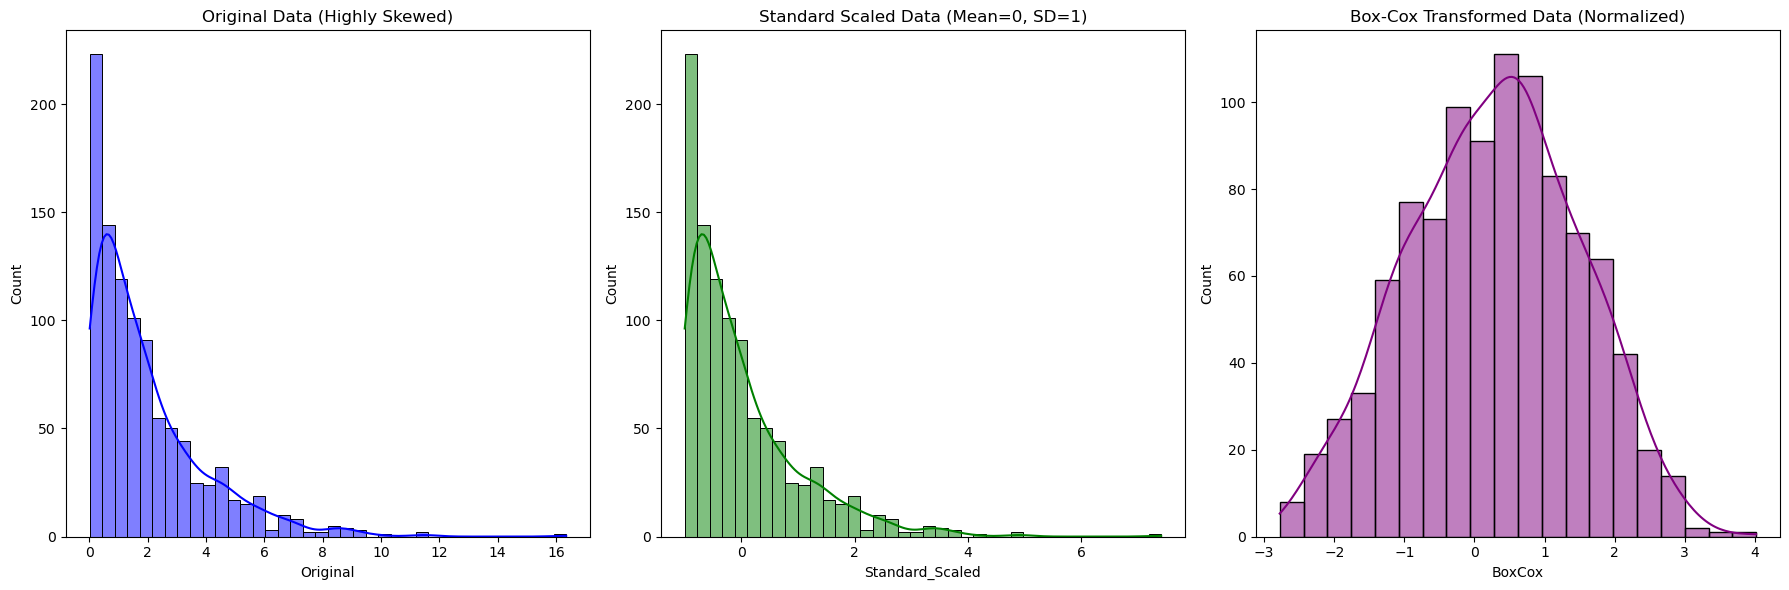

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
data = {
    'Original': np.random.exponential(scale=2, size=1000)  # Highly skewed data
}
df = pd.DataFrame(data)

# Standard Scaler
scaler = StandardScaler()
df['Standard_Scaled'] = scaler.fit_transform(df[['Original']])

# Box-Cox Transformation
# Ensure data is positive (Box-Cox requires positive values)
df['BoxCox'], lambda_value = boxcox(df['Original'])
print(f"Optimal lambda for Box-Cox: {lambda_value}")

# Plot the distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Original'], kde=True, ax=axes[0], color='blue')
axes[0].set_title("Original Data (Highly Skewed)")

sns.histplot(df['Standard_Scaled'], kde=True, ax=axes[1], color='green')
axes[1].set_title("Standard Scaled Data (Mean=0, SD=1)")

sns.histplot(df['BoxCox'], kde=True, ax=axes[2], color='purple')
axes[2].set_title("Box-Cox Transformed Data (Normalized)")

plt.tight_layout()
plt.show()


Observations from the Output:

Original Data: Highly skewed with a long tail.

Standard Scaled Data: The shape remains skewed, but the mean is centered around 0.

Box-Cox Transformed Data: The distribution becomes symmetric and closer to normal.

## How do we know if our data is not normally distributed?

##### **1. Visual Assessments**

(a) Histogram/Distribution Plot:

Look for:

- Skewness (left or right).
- Peakedness or flatness compared to a bell curve.
- Presence of multiple modes (bimodal or multimodal distributions).

(b) Q-Q Plot (Quantile-Quantile Plot):

A Q-Q plot compares the quantiles of the data to the quantiles of a theoretical normal distribution.

Normal data: Points fall approximately along the 45° reference line.

Non-normal data: Points deviate systematically (e.g., curved or S-shaped patterns).

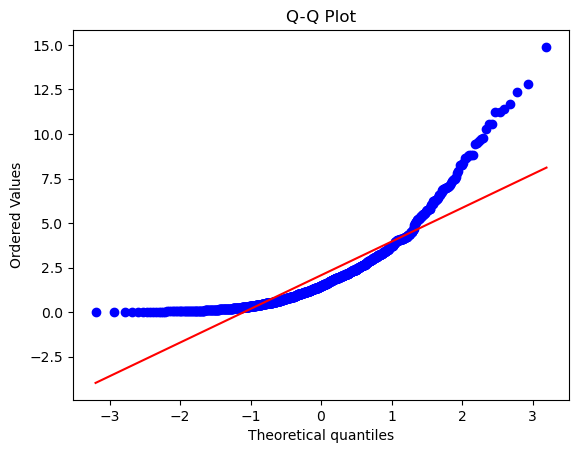

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate example data
data = np.random.exponential(scale=2, size=1000) # an exponential distribution which is NOT normal

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


##### **2. Statistical Tests for Normality**

**(a) Shapiro-Wilk Test**

Tests the null hypothesis that the data is normally distributed.

    - p-value > 0.05: Fail to reject the null hypothesis (data is normal).
    - p-value ≤ 0.05: Reject the null hypothesis (data is not normal).

In [8]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")


Shapiro-Wilk Test Statistic: 0.8101236893274129, p-value: 1.0666273570471227e-32


**(b) Kolmogorov-Smirnov Test**

Compares the sample distribution to a normal distribution. 

Like Shapiro-Wilk, a low p-value suggests non-normality.

Not Recommended for Large Sample Sizes: For large sample sizes (e.g., 1000 in your case), the K-S test becomes overly sensitive, detecting even trivial deviations from normality. Conversely, for small sample sizes, it lacks power compared to other tests like Shapiro-Wilk.

In [9]:
from scipy.stats import kstest

stat, p = kstest(data, 'norm')
print(f"Kolmogorov-Smirnov Test Statistic: {stat}, p-value: {p}")


Kolmogorov-Smirnov Test Statistic: 0.5029512376509135, p-value: 1.2373086478641388e-234


**(c) Anderson-Darling Test**

Similar to Shapiro-Wilk, but provides critical values for different significance levels.

Useful for large datasets.

In [10]:
from scipy.stats import anderson

result = anderson(data, dist='norm')
print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)


Anderson-Darling Test Statistic: 47.28857221015005
Critical Values: [0.574 0.653 0.784 0.914 1.088]


**(d) D’Agostino and Pearson’s Test**
    
Tests skewness and kurtosis to assess normality.
    
More sensitive to deviations in larger datasets.

In [11]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print(f"D’Agostino and Pearson Test Statistic: {stat}, p-value: {p}")


D’Agostino and Pearson Test Statistic: 422.1353212882413, p-value: 2.160128933460597e-92


**Which Test to Use?**

Small sample sizes (n < 50): Use the Shapiro-Wilk Test for higher sensitivity.

Large sample sizes (n > 50): Use the Anderson-Darling Test or D’Agostino and Pearson’s Test, which handle larger data better.

**Pitfalls of Only Relying on Tests**

Statistical tests may reject normality for large samples even if the deviation is minor and not practically significant.

Conversely, small samples may fail to detect non-normality.

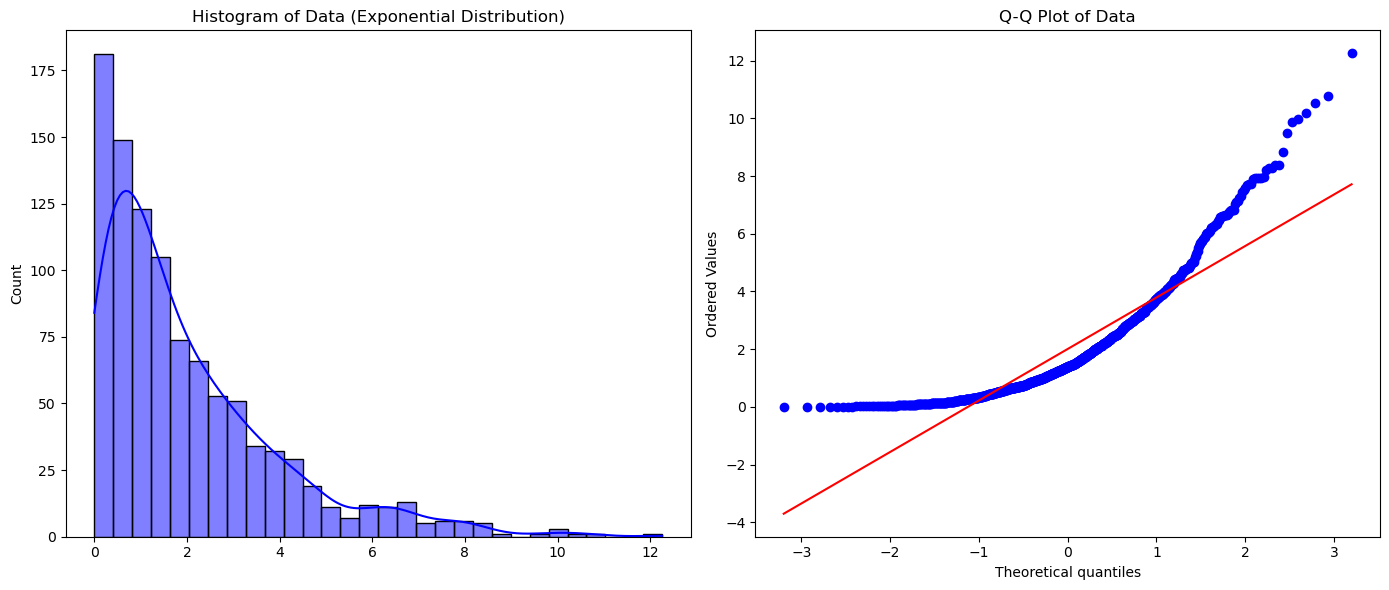


Statistical Tests for Normality:
Shapiro-Wilk Test: Statistic=0.8406, p-value=0.0000
Decision: Reject null hypothesis - Data is not normal.

D’Agostino and Pearson Test: Statistic=311.5074, p-value=0.0000
Decision: Reject null hypothesis - Data is not normal.

Anderson-Darling Test: Statistic=44.1214
Critical Values: [0.574 0.653 0.784 0.914 1.088]
Decision: Reject null hypothesis - Data is not normal.



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, probplot

# Generate exponential data
data = np.random.exponential(scale=2, size=1000)

# Visualizations
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, bins=30, color='blue')
plt.title("Histogram of Data (Exponential Distribution)")

# Q-Q Plot
plt.subplot(1, 2, 2)
probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Data")

plt.tight_layout()
plt.show()

# Statistical Tests
print("\nStatistical Tests for Normality:")

# Shapiro-Wilk Test
stat, p = shapiro(data)
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Decision: Fail to reject null hypothesis - Data is likely normal.\n")
else:
    print("Decision: Reject null hypothesis - Data is not normal.\n")

# D’Agostino and Pearson Test
stat, p = normaltest(data)
print(f"D’Agostino and Pearson Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Decision: Fail to reject null hypothesis - Data is likely normal.\n")
else:
    print("Decision: Reject null hypothesis - Data is not normal.\n")

# Anderson-Darling Test
result = anderson(data, dist='norm')
print(f"Anderson-Darling Test: Statistic={result.statistic:.4f}")
print("Critical Values:", result.critical_values)
if result.statistic < result.critical_values[2]:  # Use significance level of 5%
    print("Decision: Fail to reject null hypothesis - Data is likely normal.\n")
else:
    print("Decision: Reject null hypothesis - Data is not normal.\n")


### BONUS: From Scratch - BoxCox Function

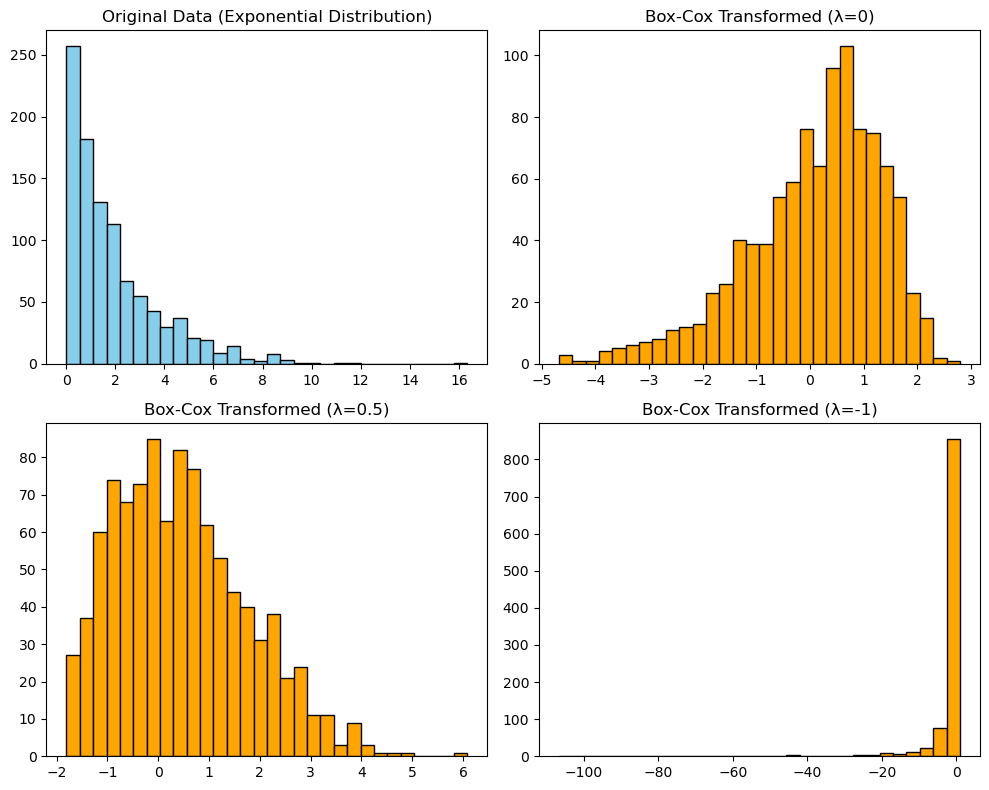

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def boxcox_transformation(data, lambda_value):
    """
    Manually applies the Box-Cox transformation to an array of data.
    Args:
        data (array-like): Input data to be transformed (must be positive).
        lambda_value (float): The lambda parameter for the Box-Cox transformation.
    Returns:
        Transformed data as a NumPy array.
    """
    if lambda_value == 0:
        # Apply log transformation when lambda is 0
        return np.log(data)
    else:
        # Apply the Box-Cox formula for non-zero lambda
        return (np.power(data, lambda_value) - 1) / lambda_value

# Generate positive sample data (Box-Cox requires positive data)
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)

# Choose a lambda value
lambda_values = [0, 0.5, -1]

# Plot original data
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(data, bins=30, color="skyblue", edgecolor="black")
plt.title("Original Data (Exponential Distribution)")

# Apply and plot Box-Cox transformations for different lambda values
for i, lambda_value in enumerate(lambda_values, 2):
    transformed_data = boxcox_transformation(data, lambda_value)
    plt.subplot(2, 2, i)
    plt.hist(transformed_data, bins=30, color="orange", edgecolor="black")
    plt.title(f"Box-Cox Transformed (λ={lambda_value})")

plt.tight_layout()
plt.show()
